In [3]:
# Upload & Read Semicolon-separated CSV
from google.colab import files
import pandas as pd

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, delimiter=';')

# Parse timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')
df = df.dropna(subset=['timestamp'])
df = df.sort_values('timestamp')

# Optional: Filter only useful columns
df = df[['timestamp', 'product', 'bid_price_1', 'ask_price_1', 'mid_price', 'profit_and_loss']]

# Downsample to 10-minute intervals, grouped by product
df.set_index('timestamp', inplace=True)
summary = df.groupby('product').resample('10Min').agg({
    'mid_price': ['mean', 'max', 'min'],
    'bid_price_1': 'mean',
    'ask_price_1': 'mean',
    'profit_and_loss': 'sum'
})

# Flatten multi-level columns
summary.columns = ['_'.join(col) for col in summary.columns]
summary = summary.reset_index()

# Add price trend info
summary['price_change'] = summary.groupby('product')['mid_price_mean'].diff()
summary['price_direction'] = summary['price_change'].apply(lambda x: 'up' if x > 0 else ('down' if x < 0 else 'flat'))

# Optional: Add volatility metric (price range)
summary['volatility'] = summary['mid_price_max'] - summary['mid_price_min']

# Keep only informative columns
final_df = summary[['product', 'timestamp', 'mid_price_mean', 'mid_price_max', 'mid_price_min',
                    'bid_price_1_mean', 'ask_price_1_mean', 'profit_and_loss_sum',
                    'price_direction', 'volatility']]

# Limit to ~10,000 rows (e.g., 10-min samples over several products, 1 day = 144 samples)
if len(final_df) > 10000:
    final_df = final_df.sample(n=10000, random_state=42).sort_values(['product', 'timestamp'])

# Save and download
output_file = 'compressed_trends_summary.csv'
final_df.to_csv(output_file, index=False)
files.download(output_file)


Saving prices_round_1_day_0.csv to prices_round_1_day_0 (2).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Please upload the 6 CSV files for Round 1 (days 0, -1, -2):
- prices_round_1_day_0.csv
- trades_round_1_day_0.csv
- prices_round_1_day_-1.csv
- trades_round_1_day_-1.csv
- prices_round_1_day_-2.csv
- trades_round_1_day_-2.csv


Saving prices_round_1_day_0.csv to prices_round_1_day_0.csv
Saving prices_round_1_day_-1.csv to prices_round_1_day_-1.csv
Saving prices_round_1_day_-2.csv to prices_round_1_day_-2.csv
Saving trades_round_1_day_0.csv to trades_round_1_day_0.csv
Saving trades_round_1_day_-1.csv to trades_round_1_day_-1.csv
Saving trades_round_1_day_-2.csv to trades_round_1_day_-2.csv

--- Loading Data ---
Reading price file: prices_round_1_day_0.csv
Reading price file: prices_round_1_day_-1.csv
Reading price file: prices_round_1_day_-2.csv
Reading trade file: trades_round_1_day_0.csv
Reading trade file: trades_round_1_day_-1.csv
Reading trade file: trades_round_1_day_-2.csv

Loaded 90000 price rows and 24886 trade rows.

--- Cleaning Price Data ---
--- Cleaning Trade Data ---

--- Price Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   d

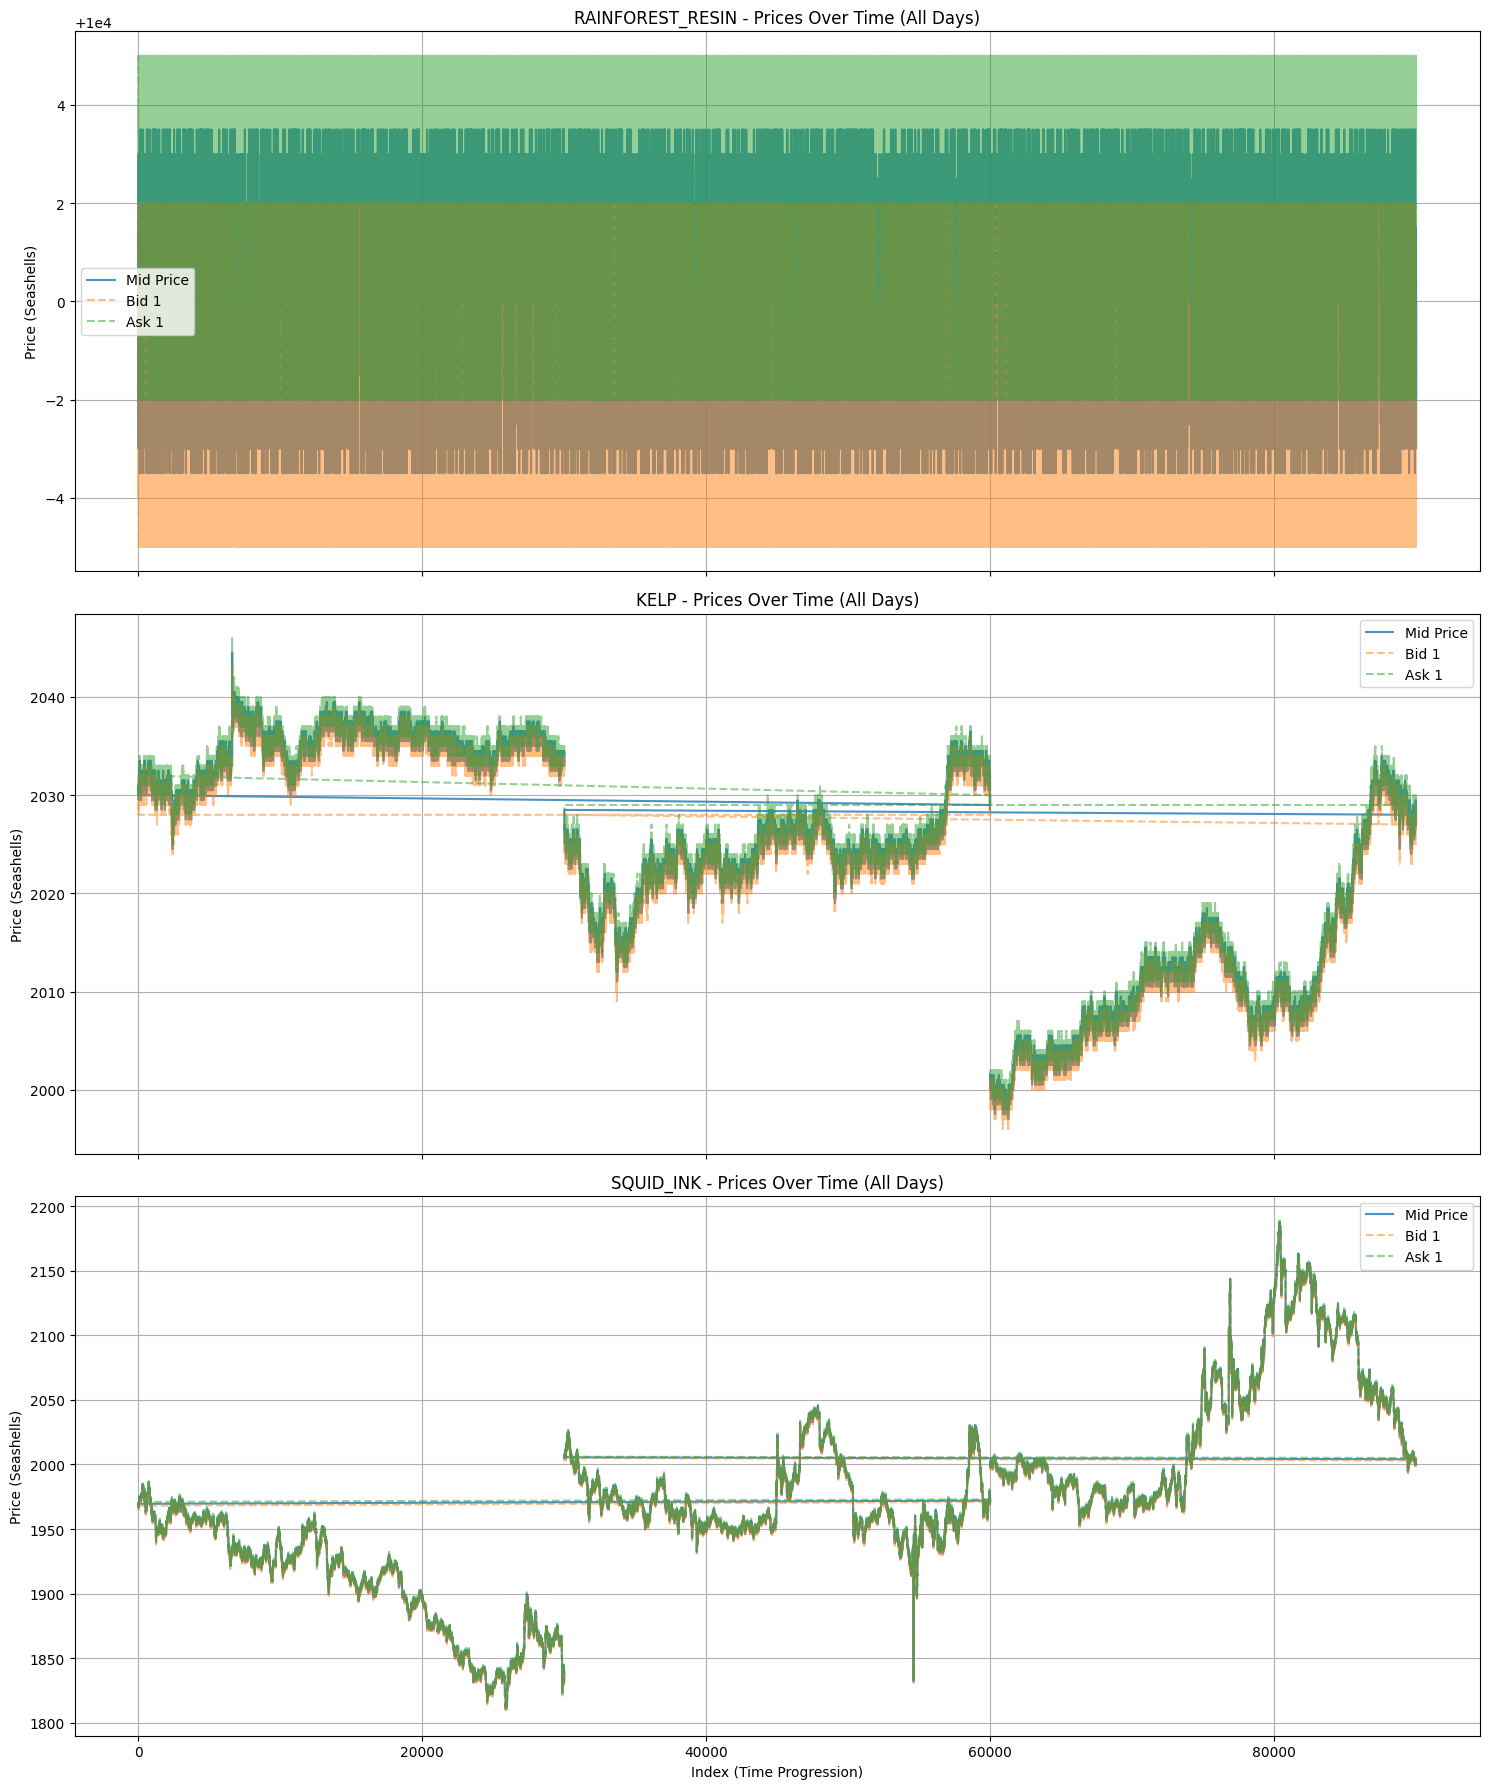


--- Plotting Spread Data ---


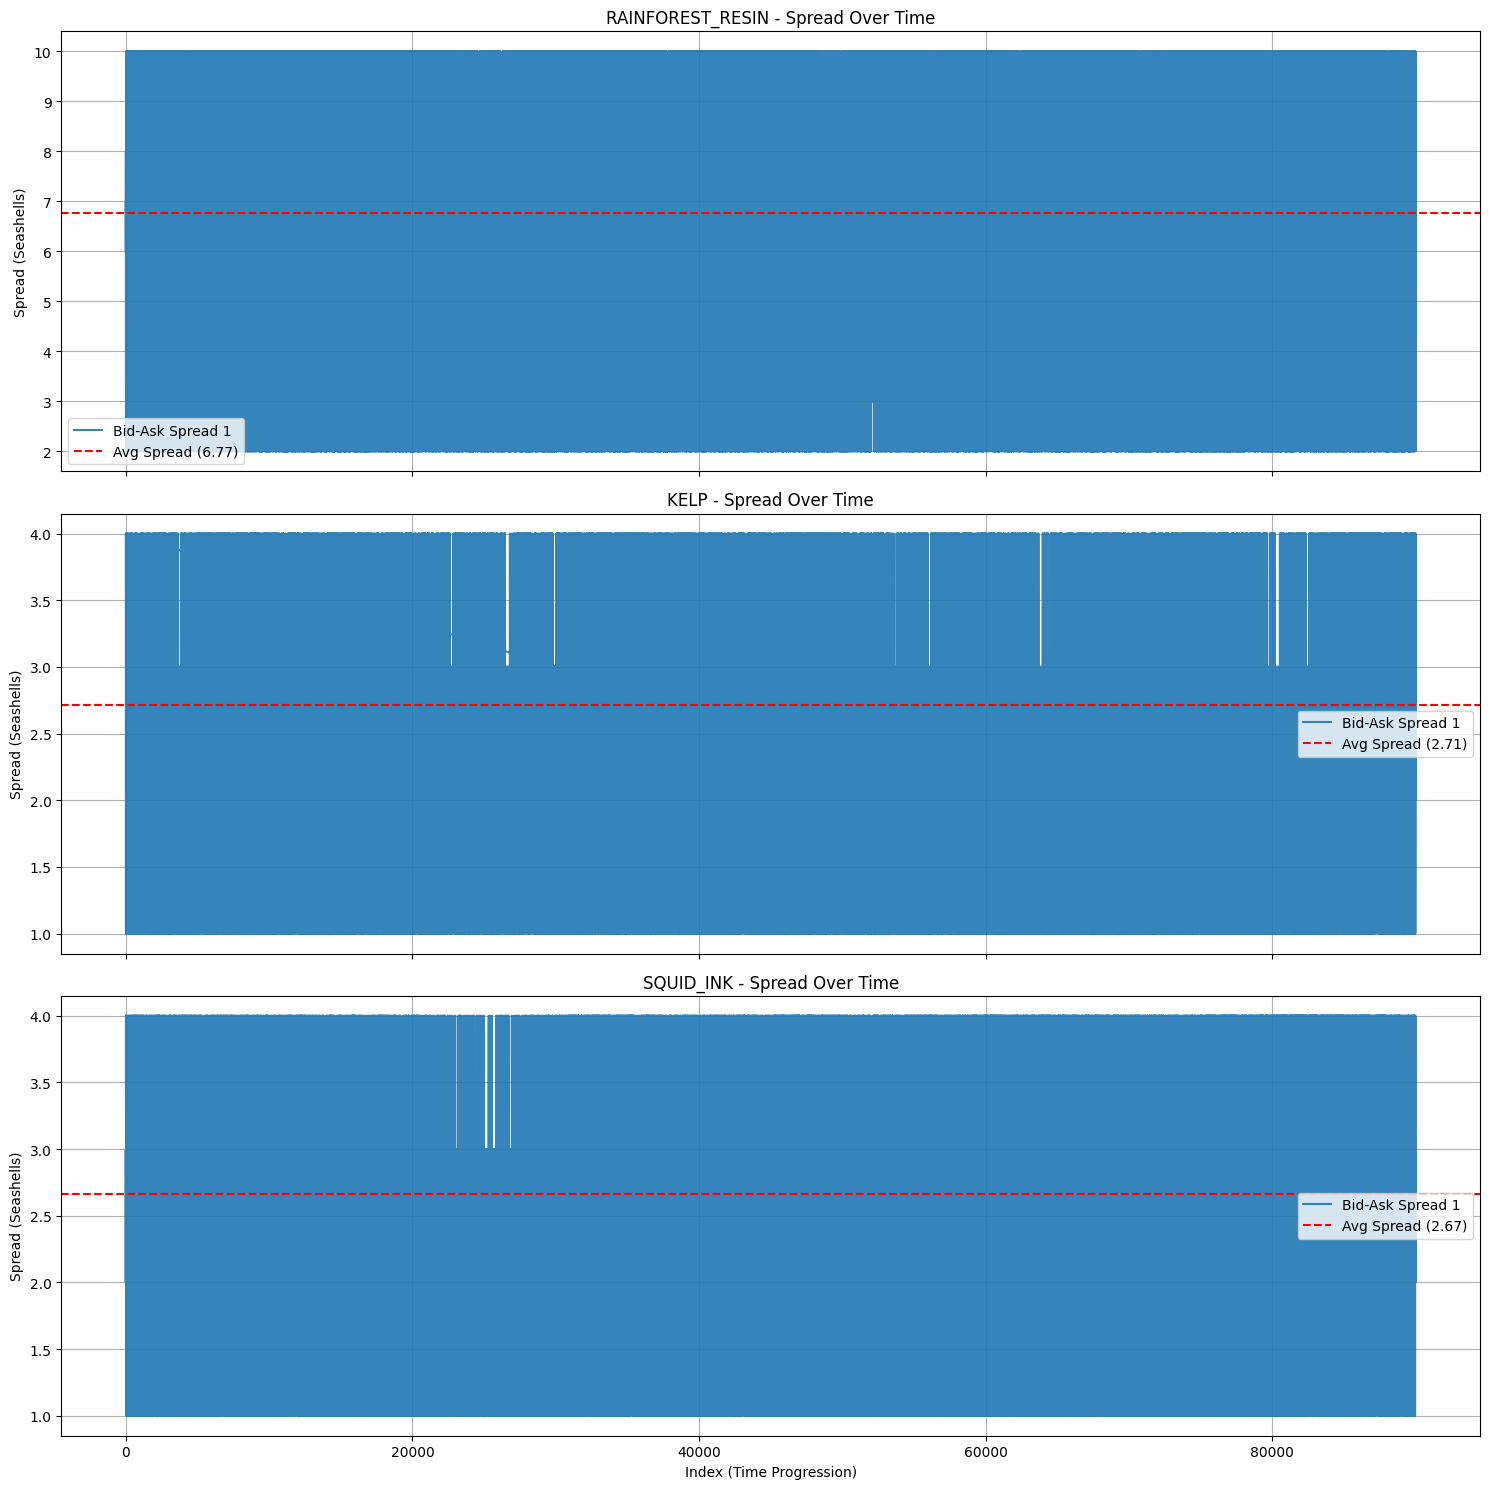


--- Plotting Volume Data (Level 1) ---


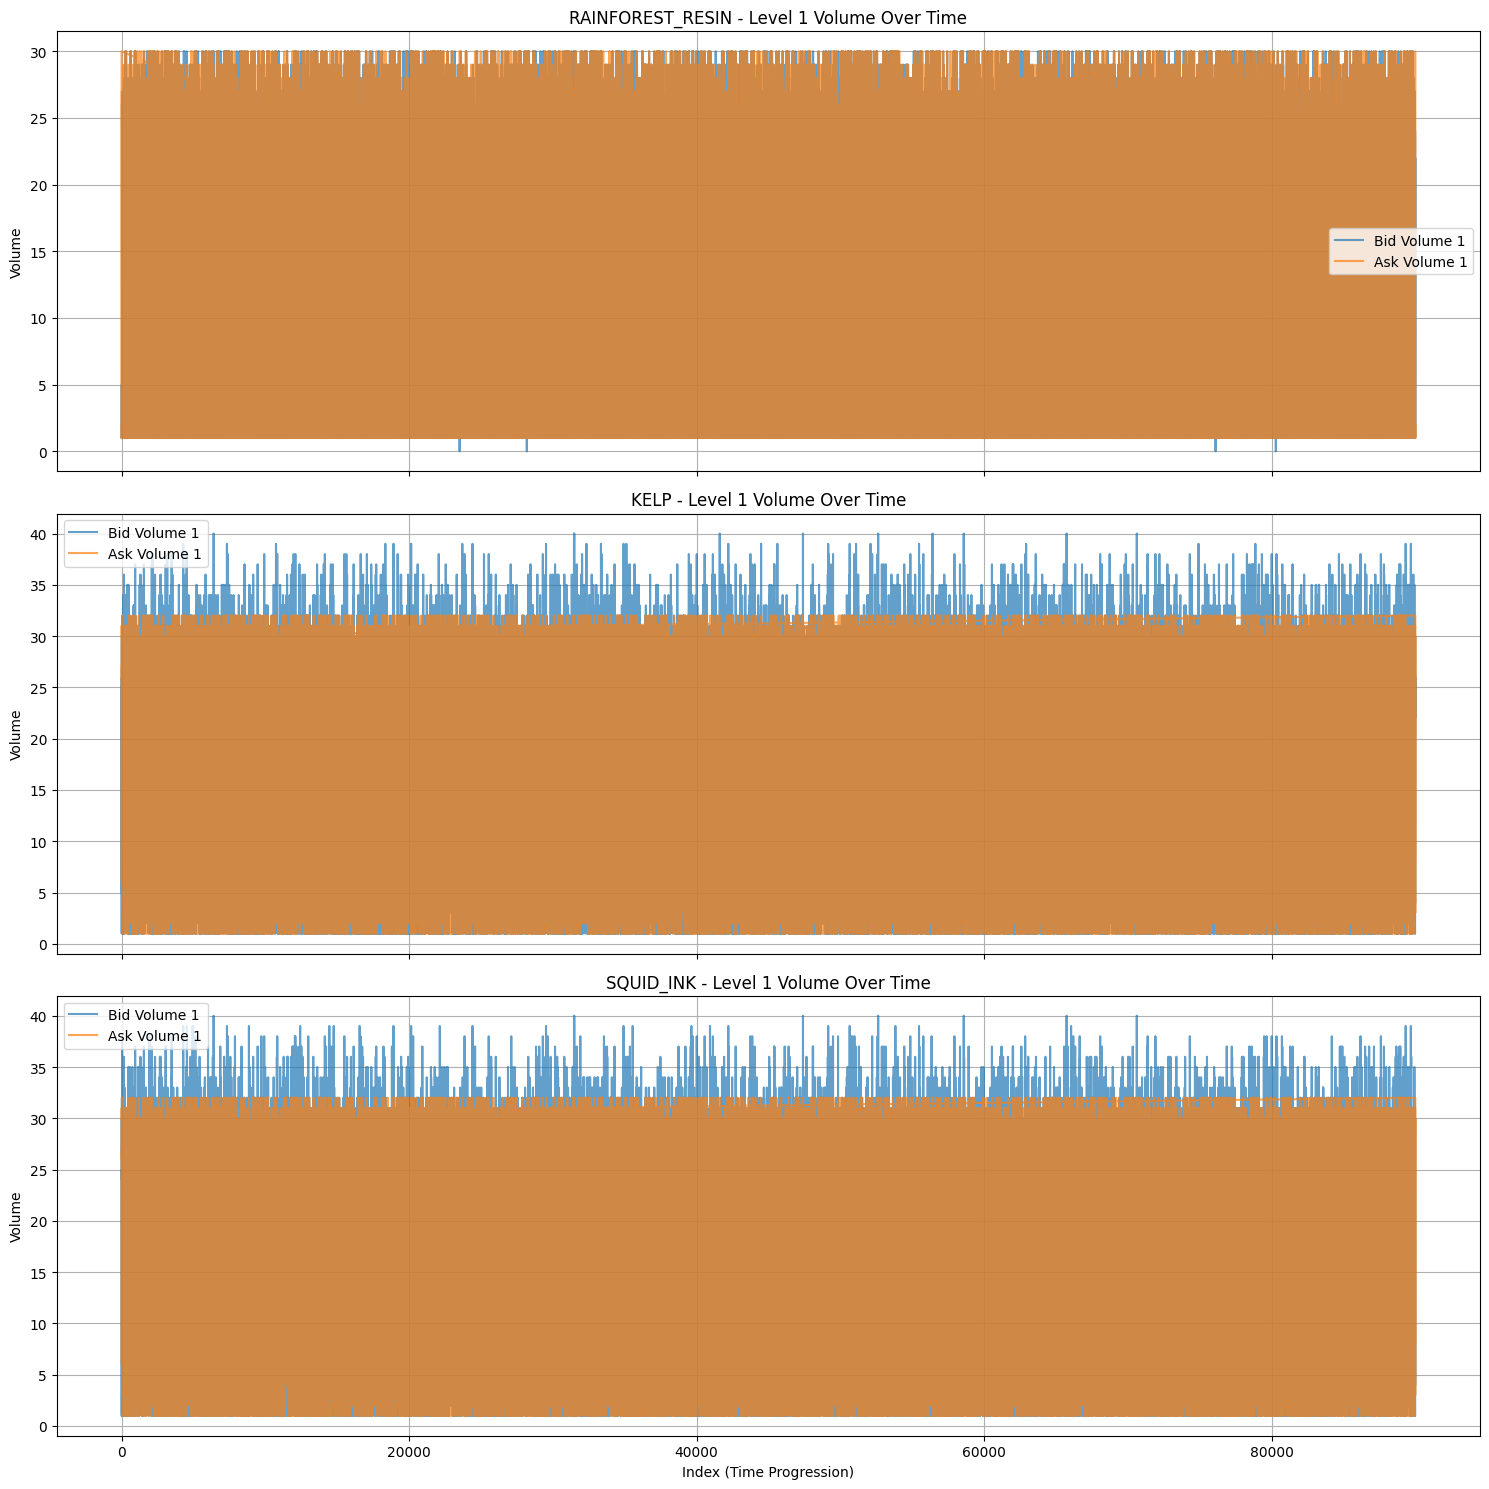


--- Analyzing Trade Data ---

Trade Volume Summary per Product:
                    sum      mean  count
symbol                                  
KELP              25148  2.856429   8804
RAINFOREST_RESIN  15237  2.103106   7245
SQUID_INK         25198  2.851420   8837


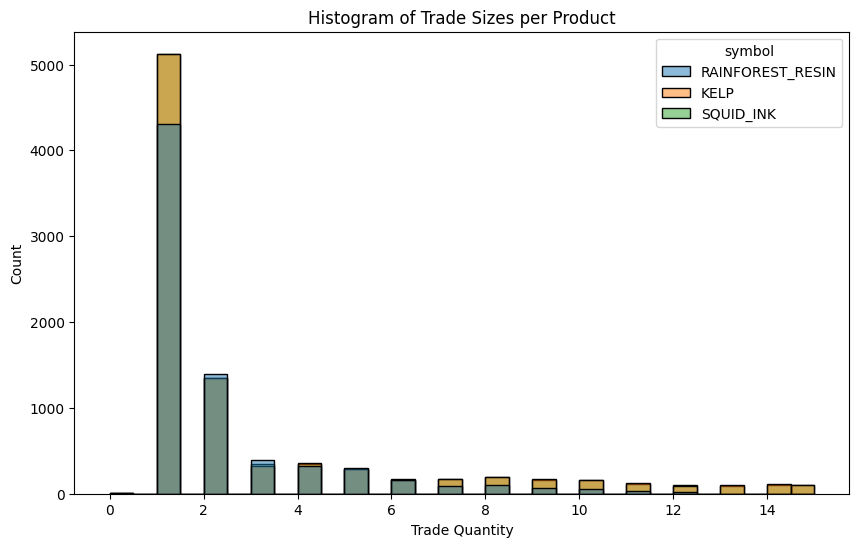



==================== Key Metrics for Strategy ====================

--- Metrics for RAINFOREST_RESIN ---
Avg Mid Price: 9999.9965
Std Dev Mid Price: 1.4966
Approx Volatility (Std Dev Returns): 0.0366
Avg Spread (L1): 6.7738
Median Spread (L1): 8.0000
Std Dev Spread (L1): 2.4802
Avg Bid Vol (L1): 8.2189
Avg Ask Vol (L1): 8.2128
Median Bid Vol (L1): 2.0000
Median Ask Vol (L1): 2.0000
Avg Imbalance (L1): 0.5010
Total Traded Volume: 15237
Avg Trade Size: 2.1031
Number of Trades: 7245
Return Autocorrelation (Lag 1): -0.4959

--- Metrics for KELP ---
Avg Mid Price: 2023.4765
Std Dev Mid Price: 10.8981
Approx Volatility (Std Dev Returns): 0.0684
Avg Spread (L1): 2.7122
Median Spread (L1): 3.0000
Std Dev Spread (L1): 0.8815
Avg Bid Vol (L1): 21.2712
Avg Ask Vol (L1): 20.1969
Median Bid Vol (L1): 25.0000
Median Ask Vol (L1): 24.0000
Avg Imbalance (L1): 0.5134
Total Traded Volume: 25148
Avg Trade Size: 2.8564
Number of Trades: 8804
Return Autocorrelation (Lag 1): -0.4566

--- Metrics for SQUID

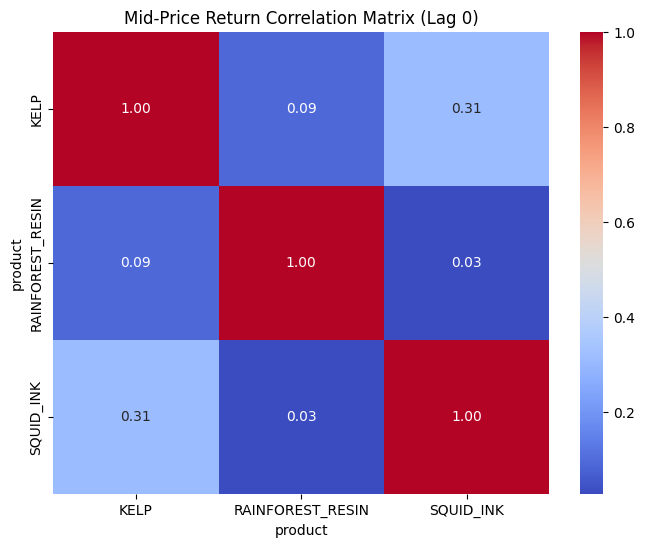


==================== End of EDA ====================

=== Summary of Key Metrics for Strategy Development ===
Please provide these numbers when asking for strategy help:

--- RAINFOREST_RESIN ---
  Avg Mid Price: 10000.00
  Std Dev Mid Price: 1.50
  Approx Volatility (Std Dev Returns): 0.0366
  Avg Spread (L1): 6.7738
  Median Spread (L1): 8.0000
  Avg Trade Size: 2.10
  Return Autocorrelation (Lag 1): -0.4959
-------------------------
--- KELP ---
  Avg Mid Price: 2023.48
  Std Dev Mid Price: 10.90
  Approx Volatility (Std Dev Returns): 0.0684
  Avg Spread (L1): 2.7122
  Median Spread (L1): 3.0000
  Avg Trade Size: 2.86
  Return Autocorrelation (Lag 1): -0.4566
-------------
--- SQUID_INK ---
  Avg Mid Price: 1971.11
  Std Dev Mid Price: 67.90
  Approx Volatility (Std Dev Returns): 0.1825
  Avg Spread (L1): 2.6657
  Median Spread (L1): 3.0000
  Avg Trade Size: 2.85
  Return Autocorrelation (Lag 1): -0.1316
------------------

--- Cross-Product Correlations ---
product               K

In [1]:
# -*- coding: utf-8 -*-
"""
Prosperity Round 1 Data EDA

Automatically generated by Colaboratory.

Instructions:
1. Run the first cell to install necessary libraries (if needed).
2. Run the second cell and upload your 6 CSV files when prompted:
   - prices_round_1_day_0.csv
   - trades_round_1_day_0.csv
   - prices_round_1_day_-1.csv
   - trades_round_1_day_-1.csv
   - prices_round_1_day_-2.csv
   - trades_round_1_day_-2.csv
3. Run the remaining cells to perform EDA.
"""

# @title 1. Install Libraries (if needed)
# !pip install pandas matplotlib seaborn numpy

# @title 2. Upload Files and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
import os

# --- File Upload ---
print("Please upload the 6 CSV files for Round 1 (days 0, -1, -2):")
print("- prices_round_1_day_0.csv")
print("- trades_round_1_day_0.csv")
print("- prices_round_1_day_-1.csv")
print("- trades_round_1_day_-1.csv")
print("- prices_round_1_day_-2.csv")
print("- trades_round_1_day_-2.csv")
uploaded = files.upload()

# --- Data Loading ---
price_dfs = []
trade_dfs = []
days = [0, -1, -2] # Days provided

required_price_files = {f"prices_round_1_day_{day}.csv" for day in days}
required_trade_files = {f"trades_round_1_day_{day}.csv" for day in days}

loaded_price_files = set()
loaded_trade_files = set()

print("\n--- Loading Data ---")
for filename, content in uploaded.items():
    try:
        # Check if it's a price or trade file based on filename convention
        if "prices" in filename and filename in required_price_files:
            print(f"Reading price file: {filename}")
            df = pd.read_csv(io.BytesIO(content), delimiter=';')
            # Keep the original 'day' column provided in the file
            # df['source_day'] = int(filename.split('_')[-1].split('.')[0]) # Extract day from filename
            price_dfs.append(df)
            loaded_price_files.add(filename)
        elif "trades" in filename and filename in required_trade_files:
            print(f"Reading trade file: {filename}")
            df = pd.read_csv(io.BytesIO(content), delimiter=';')
             # Add a 'day' column based on filename (trades file doesn't have it)
            df['day'] = int(filename.split('_')[-1].split('.')[0])
            trade_dfs.append(df)
            loaded_trade_files.add(filename)
        else:
            print(f"Warning: Skipping unrecognized file: {filename}")
    except Exception as e:
        print(f"Error reading file {filename}: {e}")

# --- Validation ---
missing_price = required_price_files - loaded_price_files
missing_trade = required_trade_files - loaded_trade_files

if missing_price:
    print(f"\nERROR: Missing required price files: {', '.join(missing_price)}")
if missing_trade:
    print(f"ERROR: Missing required trade files: {', '.join(missing_trade)}")

if not price_dfs or not trade_dfs:
    print("ERROR: Could not load necessary price or trade data. Aborting.")
    # Or raise an error: raise ValueError("Essential data files missing.")
else:
    # Concatenate dataframes
    prices_df = pd.concat(price_dfs, ignore_index=True)
    trades_df = pd.concat(trade_dfs, ignore_index=True)

    print(f"\nLoaded {len(prices_df)} price rows and {len(trades_df)} trade rows.")

    # Basic Cleaning and Type Conversion (Prices)
    print("\n--- Cleaning Price Data ---")
    prices_df.replace("", np.nan, inplace=True) # Replace empty strings with NaN
    price_cols_to_numeric = ['bid_price_1', 'bid_volume_1', 'bid_price_2', 'bid_volume_2',
                             'bid_price_3', 'bid_volume_3', 'ask_price_1', 'ask_volume_1',
                             'ask_price_2', 'ask_volume_2', 'ask_price_3', 'ask_volume_3',
                             'mid_price', 'profit_and_loss']
    for col in price_cols_to_numeric:
        if col in prices_df.columns:
             prices_df[col] = pd.to_numeric(prices_df[col], errors='coerce') # Coerce errors to NaN

    # Basic Cleaning and Type Conversion (Trades)
    print("--- Cleaning Trade Data ---")
    trades_df['timestamp'] = pd.to_numeric(trades_df['timestamp'], errors='coerce')
    trades_df['price'] = pd.to_numeric(trades_df['price'], errors='coerce')
    trades_df['quantity'] = pd.to_numeric(trades_df['quantity'], errors='coerce')
    trades_df.dropna(subset=['timestamp', 'price', 'quantity', 'symbol'], inplace=True) # Drop rows where essential info is missing

    print("\n--- Price Data Info ---")
    prices_df.info()
    print("\n--- Price Data Head ---")
    print(prices_df.head())

    print("\n--- Trade Data Info ---")
    trades_df.info()
    print("\n--- Trade Data Head ---")
    print(trades_df.head())

# @title 3. General EDA and Visualizations (All Products)

if 'prices_df' in locals() and 'trades_df' in locals():
    products = prices_df['product'].unique()
    print(f"\nProducts found: {products}")

    # --- Price Visualizations ---
    print("\n--- Plotting Price Data ---")
    fig_price, axes_price = plt.subplots(len(products), 1, figsize=(15, 6 * len(products)), sharex=True)
    if len(products) == 1: axes_price = [axes_price] # Ensure axes_price is iterable for single product

    for i, product in enumerate(products):
        prod_df = prices_df[prices_df['product'] == product].sort_values(by=['day', 'timestamp'])
        axes_price[i].plot(prod_df.index, prod_df['mid_price'], label='Mid Price', alpha=0.8)
        axes_price[i].plot(prod_df.index, prod_df['bid_price_1'], label='Bid 1', alpha=0.5, linestyle='--')
        axes_price[i].plot(prod_df.index, prod_df['ask_price_1'], label='Ask 1', alpha=0.5, linestyle='--')
        axes_price[i].set_title(f'{product} - Prices Over Time (All Days)')
        axes_price[i].set_ylabel('Price (Seashells)')
        axes_price[i].legend()
        axes_price[i].grid(True)

    plt.xlabel("Index (Time Progression)")
    plt.tight_layout()
    plt.show()

    # --- Spread Visualizations ---
    print("\n--- Plotting Spread Data ---")
    prices_df['spread_1'] = prices_df['ask_price_1'] - prices_df['bid_price_1']
    fig_spread, axes_spread = plt.subplots(len(products), 1, figsize=(15, 5 * len(products)), sharex=True)
    if len(products) == 1: axes_spread = [axes_spread]

    for i, product in enumerate(products):
        prod_df = prices_df[prices_df['product'] == product].sort_values(by=['day', 'timestamp'])
        axes_spread[i].plot(prod_df.index, prod_df['spread_1'], label='Bid-Ask Spread 1', alpha=0.9)
        avg_spread = prod_df['spread_1'].mean()
        axes_spread[i].axhline(avg_spread, color='red', linestyle='--', label=f'Avg Spread ({avg_spread:.2f})')
        axes_spread[i].set_title(f'{product} - Spread Over Time')
        axes_spread[i].set_ylabel('Spread (Seashells)')
        axes_spread[i].legend()
        axes_spread[i].grid(True)

    plt.xlabel("Index (Time Progression)")
    plt.tight_layout()
    plt.show()

    # --- Volume Visualizations (Level 1) ---
    print("\n--- Plotting Volume Data (Level 1) ---")
    fig_vol, axes_vol = plt.subplots(len(products), 1, figsize=(15, 5 * len(products)), sharex=True)
    if len(products) == 1: axes_vol = [axes_vol]

    for i, product in enumerate(products):
        prod_df = prices_df[prices_df['product'] == product].sort_values(by=['day', 'timestamp'])
        axes_vol[i].plot(prod_df.index, prod_df['bid_volume_1'], label='Bid Volume 1', alpha=0.7)
        axes_vol[i].plot(prod_df.index, prod_df['ask_volume_1'], label='Ask Volume 1', alpha=0.7)
        axes_vol[i].set_title(f'{product} - Level 1 Volume Over Time')
        axes_vol[i].set_ylabel('Volume')
        axes_vol[i].legend()
        axes_vol[i].grid(True)

    plt.xlabel("Index (Time Progression)")
    plt.tight_layout()
    plt.show()

    # --- Trade Volume Analysis ---
    print("\n--- Analyzing Trade Data ---")
    trades_df['abs_quantity'] = trades_df['quantity'].abs()
    trade_summary = trades_df.groupby('symbol')['abs_quantity'].agg(['sum', 'mean', 'count'])
    print("\nTrade Volume Summary per Product:")
    print(trade_summary)

    fig_trade_vol, ax_trade_vol = plt.subplots(1, 1, figsize=(10, 6))
    sns.histplot(data=trades_df, x='abs_quantity', hue='symbol', kde=False, ax=ax_trade_vol, bins=30)
    ax_trade_vol.set_title('Histogram of Trade Sizes per Product')
    ax_trade_vol.set_xlabel('Trade Quantity')
    plt.show()

else:
    print("DataFrames not loaded correctly, skipping EDA.")


# @title 4. Calculate Key Metrics for Strategy Formulation

if 'prices_df' in locals() and 'trades_df' in locals():
    print("\n\n" + "="*20 + " Key Metrics for Strategy " + "="*20)

    results = {}

    for product in products:
        print(f"\n--- Metrics for {product} ---")
        prices_prod = prices_df[prices_df['product'] == product].copy()
        trades_prod = trades_df[trades_df['symbol'] == product].copy()

        # Ensure spread is calculated
        if 'spread_1' not in prices_prod.columns:
             prices_prod['spread_1'] = prices_prod['ask_price_1'] - prices_prod['bid_price_1']

        # Price Stats
        mid_price_mean = prices_prod['mid_price'].mean()
        mid_price_std = prices_prod['mid_price'].std()
        prices_prod['mid_price_return'] = prices_prod['mid_price'].pct_change()
        volatility = prices_prod['mid_price_return'].std() * np.sqrt(len(prices_prod)) # Approximate annualized/period vol

        # Spread Stats
        avg_spread = prices_prod['spread_1'].mean()
        std_spread = prices_prod['spread_1'].std()
        median_spread = prices_prod['spread_1'].median()

        # Volume Stats (Level 1)
        avg_bid_vol_1 = prices_prod['bid_volume_1'].mean()
        avg_ask_vol_1 = prices_prod['ask_volume_1'].mean()
        median_bid_vol_1 = prices_prod['bid_volume_1'].median()
        median_ask_vol_1 = prices_prod['ask_volume_1'].median()

        # Order Book Imbalance (Example: Simple Level 1)
        prices_prod['imbalance_1'] = prices_prod['bid_volume_1'] / (prices_prod['bid_volume_1'] + prices_prod['ask_volume_1'])
        avg_imbalance_1 = prices_prod['imbalance_1'].mean()

        # Trade Stats
        total_traded_volume = trades_prod['abs_quantity'].sum()
        avg_trade_size = trades_prod['abs_quantity'].mean()
        num_trades = trades_prod.shape[0]

        # Autocorrelation (Example: Lag 1 of mid-price returns)
        autocorr_lag1 = prices_prod['mid_price_return'].autocorr(lag=1) if not prices_prod['mid_price_return'].isnull().all() else np.nan

        results[product] = {
            "Avg Mid Price": mid_price_mean,
            "Std Dev Mid Price": mid_price_std,
            "Approx Volatility (Std Dev Returns)": volatility,
            "Avg Spread (L1)": avg_spread,
            "Median Spread (L1)": median_spread,
            "Std Dev Spread (L1)": std_spread,
            "Avg Bid Vol (L1)": avg_bid_vol_1,
            "Avg Ask Vol (L1)": avg_ask_vol_1,
            "Median Bid Vol (L1)": median_bid_vol_1,
            "Median Ask Vol (L1)": median_ask_vol_1,
            "Avg Imbalance (L1)": avg_imbalance_1,
            "Total Traded Volume": total_traded_volume,
            "Avg Trade Size": avg_trade_size,
            "Number of Trades": num_trades,
            "Return Autocorrelation (Lag 1)": autocorr_lag1
        }

        # Print results for this product
        for key, value in results[product].items():
             print(f"{key}: {value:.4f}" if isinstance(value, float) else f"{key}: {value}")


    # --- Cross-Product Correlations ---
    print("\n--- Cross-Product Mid-Price Return Correlations (Lag 0) ---")
    # Pivot price data to have products as columns
    price_pivot = prices_df.pivot_table(index=['day', 'timestamp'], columns='product', values='mid_price')
    # Calculate percentage returns
    returns_pivot = price_pivot.pct_change()
    # Calculate correlation matrix
    correlation_matrix = returns_pivot.corr()
    print(correlation_matrix)

    print("\n--- Plotting Correlation Heatmap ---")
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Mid-Price Return Correlation Matrix (Lag 0)')
    plt.show()

    print("\n" + "="*20 + " End of EDA " + "="*20)

else:
    print("DataFrames not loaded correctly, cannot calculate metrics.")


# @title 5. Information Needed for Strategy Development (Summary)

if 'results' in locals():
    print("\n=== Summary of Key Metrics for Strategy Development ===")
    print("Please provide these numbers when asking for strategy help:\n")

    for product, metrics in results.items():
        print(f"--- {product} ---")
        print(f"  Avg Mid Price: {metrics.get('Avg Mid Price', 'N/A'):.2f}")
        print(f"  Std Dev Mid Price: {metrics.get('Std Dev Mid Price', 'N/A'):.2f}")
        print(f"  Approx Volatility (Std Dev Returns): {metrics.get('Approx Volatility (Std Dev Returns)', 'N/A'):.4f}")
        print(f"  Avg Spread (L1): {metrics.get('Avg Spread (L1)', 'N/A'):.4f}")
        print(f"  Median Spread (L1): {metrics.get('Median Spread (L1)', 'N/A'):.4f}")
        print(f"  Avg Trade Size: {metrics.get('Avg Trade Size', 'N/A'):.2f}")
        print(f"  Return Autocorrelation (Lag 1): {metrics.get('Return Autocorrelation (Lag 1)', 'N/A'):.4f}")
        print("-" * (len(product) + 9))

    print("\n--- Cross-Product Correlations ---")
    print(correlation_matrix)
    print("\n======================================================")

else:
    print("Metrics could not be calculated.")